# Meteo Analysis

in this notebook various parts of the climatology and meteorology are analysed.  
figures for the report are made 

In [78]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D

## precip climatology
makes a figure that shows differences in precipition within the basin


### bar chart 2 locations
shows the monthly precipiton for 2 locations

In [79]:
file_name_pr = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/forcing_5570/AralSeaBasin/pcrglobwb/work/diagnostic/script/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1955-1970_AralSeaBasin.nc'

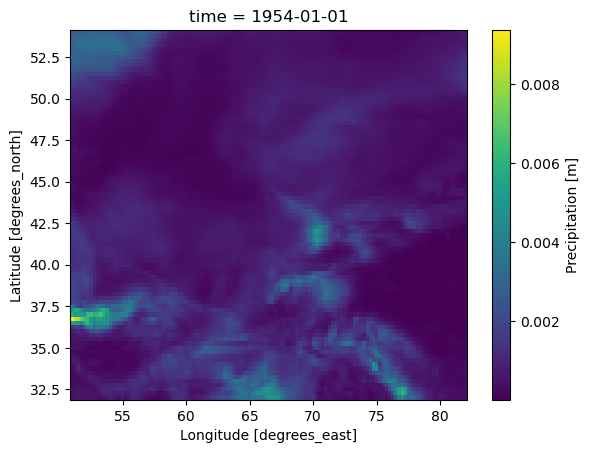

In [80]:
# open the file
ds = xr.open_dataset(file_name_pr);




# quick plot
ds["pr"].isel(time=0).plot()

In [81]:
# extract time series at nearest grid point
ts_1 = ds["pr"].sel(lat=38.9, lon=69, method="nearest")
ts_2 = ds["pr"].sel(lat=45.7, lon=63.3, method="nearest")
# monthly total (sum of daily values per month), convert m → mm
ts1_mm_month = ts_1.resample(time="ME").sum() * 1000 
ts2_mm_month = ts_2.resample(time="ME").sum() * 1000  

# climatology: average Jan–Dec pattern across years
clim_monthly_1 = ts1_mm_month.groupby("time.month").mean("time")
clim_monthly_2 = ts2_mm_month.groupby("time.month").mean("time")


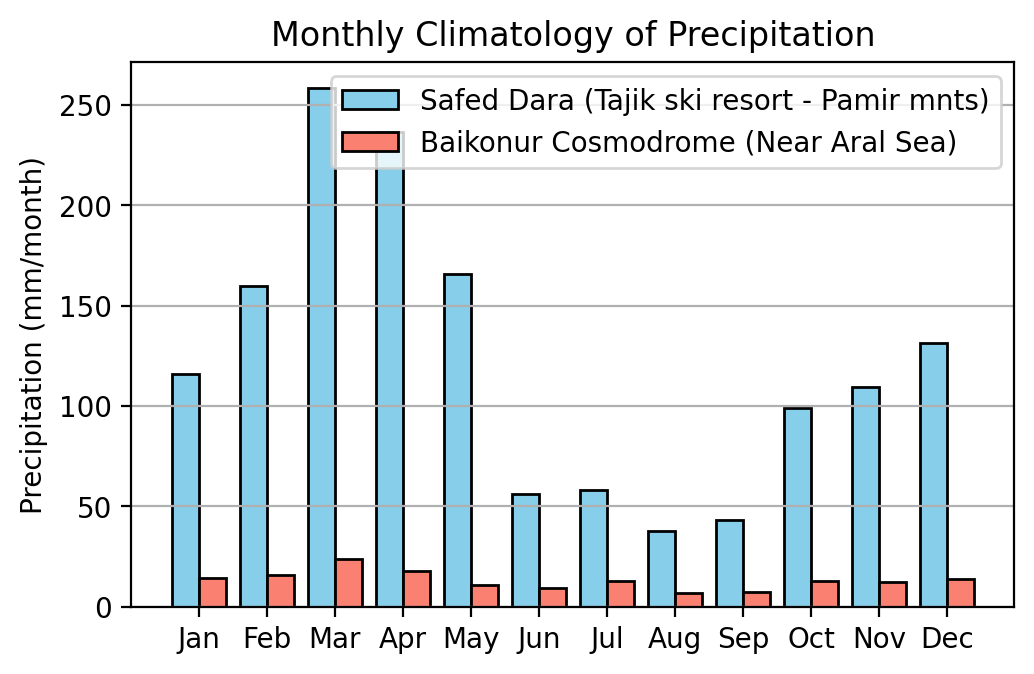

In [97]:
# months 1–12
months = np.arange(1, 13)

# bar width and positions
bar_width = 0.4
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(5,3.2), dpi=200)

ax.bar(x - bar_width/2, clim_monthly_1.values, 
       width=bar_width, label="Safed Dara (Tajik ski resort - Pamir mnts)", color="skyblue", edgecolor="black")
ax.bar(x + bar_width/2, clim_monthly_2.values, 
       width=bar_width, label="Baikonur Cosmodrome (Near Aral Sea)", color="salmon", edgecolor="black")

ax.set_xticks(x)
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun",
                    "Jul","Aug","Sep","Oct","Nov","Dec"])
ax.set_ylabel("Precipitation (mm/month)")
ax.set_title("Monthly Climatology of Precipitation")
ax.legend()
ax.grid(axis="y")
fig.tight_layout(pad=0.1)
plt.savefig('precip_difference.png', bbox_inches='tight', pad_inches=0.05, dpi=200)
plt.show()

### contour plot for whole basin
plots contour plot

In [83]:
# Suppose variable is "pr" and units are mm/day
da = ds["pr"]

# Convert to mm/year if needed
# sum over time and scale: daily to annual sum
# Or just take mean per year if you want mm/day
da_yearly = da.resample(time="1Y").sum(dim="time")*1000
da_avg_year = da_yearly.mean(dim="time")  # average yearly precipitation

/opt/conda/envs/ewatercycle2/lib/python3.12/site-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


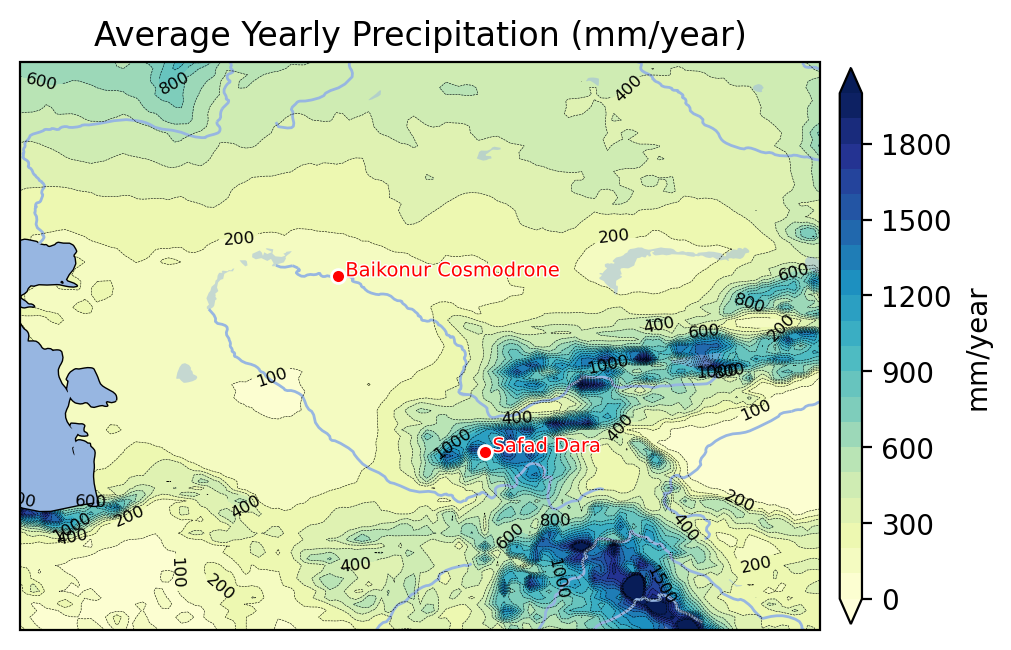

In [92]:
# Define min and max for levels (e.g., ignore extreme outlier)
vmin = 0   # mm/year
vmax = 2000  # mm/year
n_levels = 21
levels = np.linspace(vmin, vmax, n_levels)


fig, ax = plt.subplots(figsize=(5, 4),dpi=200, subplot_kw={'projection': ccrs.PlateCarree()})

# Filled contours
im = ax.contourf(
    da_avg_year['lon'], da_avg_year['lat'], da_avg_year,
    levels=levels,
    cmap="YlGnBu",
    extend='both'  # adds arrows if values go below vmin or above vmax
)

# Contour lines
cs = ax.contour(
    da_avg_year['lon'], da_avg_year['lat'], da_avg_year,
    levels=levels,          # same levels as filled contours
    colors='k',             # line color
    linewidths=0.2,         # thickness
    linestyles='--'         # dashed lines (optional)
)

# Add labels to contour lines
#ax.clabel(cs, levels=levels[::5], inline=True, fmt="%.0f")  # label every other level
major_levels = [100,200, 400, 600, 800, 1000, 1500]

ax.clabel(
    cs,
    levels=major_levels,
    inline=True,
    fmt="%.0f",
    fontsize=6
)

lat1, lon1 = 38.9, 69
lat2, lon2 = 45.7, 63.3

# Add markers

# Create a marker with white outline
marker1 = Line2D([lon1], [lat1],
                 marker='o', color='red', markersize=5,
                 transform=ccrs.PlateCarree(),
                 markeredgecolor='white', markeredgewidth=1)
ax.add_line(marker1)

marker2 = Line2D([lon2], [lat2],
                 marker='o', color='red', markersize=5,
                 transform=ccrs.PlateCarree(),
                 markeredgecolor='white', markeredgewidth=1)
ax.add_line(marker2)

#Optional: add text labels
ax.text(
    lon1+0.3, lat1, "Safad Dara",
    transform=ccrs.PlateCarree(),
    fontsize=7,
    color='red',
    path_effects=[pe.withStroke(linewidth=1, foreground="white")]  # white outline
)
ax.text(
    lon2+0.3, lat2, "Baikonur Cosmodrone",
    transform=ccrs.PlateCarree(),
    fontsize=7,
    color='red',
    path_effects=[pe.withStroke(linewidth=1, foreground="white")]  # white outline
)
# ax.text(lon1+0.3, lat1, "Safad Dara", transform=ccrs.PlateCarree(), fontsize=7, color='red')
# ax.text(lon2+0.3, lat2, "Baikonur Cosmodrone", transform=ccrs.PlateCarree(), fontsize=7, color='red')

# Add map features
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.OCEAN, zorder=2)
ax.add_feature(cfeature.RIVERS)
ax.set_title("Average Yearly Precipitation (mm/year)")

# Colorbar
cbar = fig.colorbar(im, ax=ax, orientation="vertical",
                    shrink=0.7,  # 70% of figure height
                    aspect=25,   # thinner
                    pad=0.02)    # distance to map
cbar.set_label("mm/year")
fig.tight_layout(pad=0.1)
plt.savefig('precip_contour.png', bbox_inches='tight', pad_inches=0.05, dpi=200)
plt.show()
